<a href="https://colab.research.google.com/github/Marcusreu1/DataScienceToolkit/blob/main/preprocesamiento_para_linea_regresional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#tutorial preprocesamiento linea regresional
Lo primero que haremos en este tutorial es hacer los pasos anteriores que consistia en la limpieza de datos y el analisis de estos

#data cleaning

In [7]:
#primero importamos la libreria necesaria
import pandas as pd

#leemos la data con pd.read_csv
df= pd.read_csv("datos_personas.csv")

In [8]:
df.head()

,ingreso,carros
0,22273.577534,3
1,8961.047249,1
2,7437.977263,2
3,12064.915290,2
4,9296.396167,1


In [9]:
print(df.shape)

(1000, 2)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ingreso  1000 non-null   float64
 1   carros   1000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [11]:
df.isnull().sum()

ingreso    0
carros     0
dtype: int64

In [12]:
#eliminar valores nulos
df=df.dropna()

In [13]:
df.isnull().sum()

ingreso    0
carros     0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
#en este caso no hay pero en caso de haberlo hubiera continuado con
df=df.drop_duplicates(keep="first")

In [16]:
df.describe()

,ingreso,carros
count,1000.000000,1000.000000
mean,10078.606402,1.239000
std,2533.681258,1.030991
min,1222.253800,0.000000
25%,8397.061976,0.000000
50%,10072.833245,1.000000
75%,11689.680823,2.000000
max,22273.577534,3.000000


#EDA

In [18]:
df["carros"].unique()

array([3, 1, 2, 0])

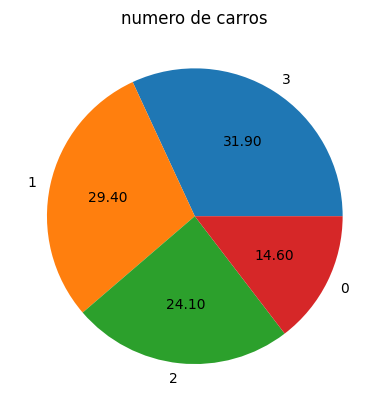

In [20]:
import matplotlib.pyplot as plt
plt.title("numero de carros")
plt.pie(df['carros'].value_counts(), labels=[3, 1, 2, 0], autopct= "%0.2f")
plt.show()

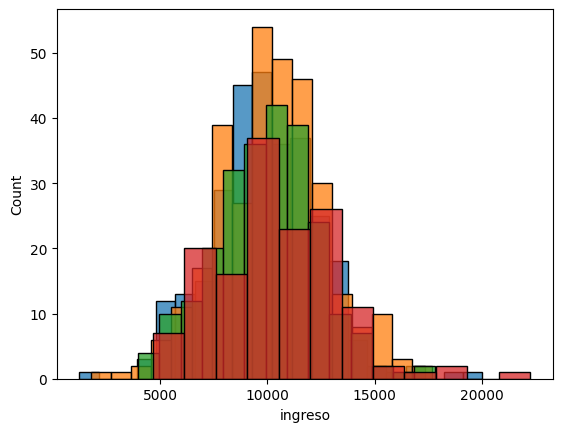

In [33]:
import seaborn as sns
sns.histplot(df[df['carros']== 0]['ingreso'])
sns.histplot(df[df['carros']== 1]['ingreso'])
sns.histplot(df[df['carros']== 2]['ingreso'])
sns.histplot(df[df['carros']== 3]['ingreso'])
plt.show()

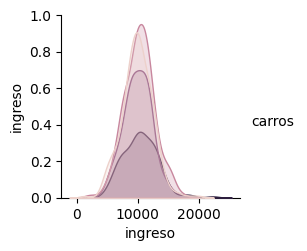

In [31]:
sns.pairplot(df,hue="carros")

##codificación categórica
aqui puedes ver como pasar valores numericos a categoricos de dos distintas formas, una manual y otra por agrupacion

In [34]:
mapeo={
    0:"cero",
    1:"uno",
    2: "dos",
    3:"tres"
}

df["carros"]=df["carros"].map(mapeo)

In [37]:
df.head()


,ingreso,carros
0,22273.577534,tres
1,8961.047249,uno
2,7437.977263,dos
3,12064.915290,dos
4,9296.396167,uno


In [38]:
df["ingreso"].describe()

count     1000.000000
mean     10078.606402
std       2533.681258
min       1222.253800
25%       8397.061976
50%      10072.833245
75%      11689.680823
max      22273.577534
Name: ingreso, dtype: float64

In [46]:
#definimos la agrupacion
bins=[0, 1500, 5000, 10000, 40000]

labels = ['bajo', 'medio', 'alto', 'muy alto']

df["ingreso_cat"]=pd.cut(df['ingreso'], bins=bins,labels=labels)
df.head()

,ingreso,carros,ingreso_cat
0,22273.577534,tres,muy alto
1,8961.047249,uno,alto
2,7437.977263,dos,alto
3,12064.915290,dos,muy alto
4,9296.396167,uno,alto


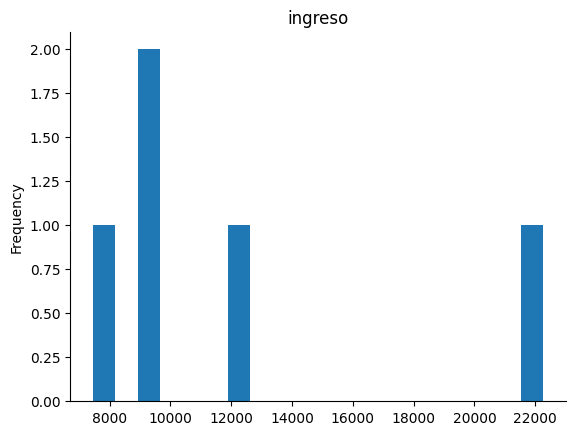

In [43]:
from matplotlib import pyplot as plt
_df_0['ingreso'].plot(kind='hist', bins=20, title='ingreso')
plt.gca().spines[['top', 'right',]].set_visible(False)

#paso 1
el paso 1 al momento de preprocesar la data es el label encoding.
el label encoding consiste en pasar los valores categoricos a numericos,
en este caso podemos ver que tenemos dos columnas categoricas que son ingreso_cat y carros

##label encoding

In [51]:
#utilizamos sklearn para hacer el label encoder
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

df['carros']=encoder.fit_transform(df['carros'])
df['ingreso_cat']=encoder.fit_transform(df['ingreso_cat'])

df.head()

,ingreso,carros,ingreso_cat
0,22273.577534,2,3
1,8961.047249,3,0
2,7437.977263,1,0
3,12064.915290,1,3
4,9296.396167,3,0


#paso 2
el paso 2 es dividir la data para tener contenido para entrenar y testear a la hora de entrenar el modelo

##split

In [52]:
train_features = df.sample(frac=0.8, random_state=0)
test_features = df.drop(train_features.index)

In [54]:
train_dataset = train_features.copy()
test_dataset = test_features.copy()

#quitamos el valor que estamos prediciendo
train_labels=train_dataset.pop('carros')
test_labels=test_dataset.pop('carros')


#paso 3
el paso 3 consiste en la normalizacion de datos, esto es importante ya que a la hora de entrenar un modelo como lo es la regresion lineal esta asume que todos los datos estan en la misma escala, asi que por eso normalizamos los datos

##normalizacion

In [55]:
from tensorflow.keras import layers
import numpy as np
normalizer = layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))

#modelo
esta seccion es para comprobar que el proceso fue exitoso,

In [60]:
from tensorflow import keras
import tensorflow as tf


def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['mae', 'mse']
                )
  return model

In [61]:
model=build_and_compile_model(normalizer)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 2)                 5         
 on)                                                             
                                                                 
 dense_3 (Dense)             (None, 64)                192       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4422 (17.28 KB)
Trainable params: 4417 (17.25 KB)
Non-trainable params: 5 (24.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(
    train_dataset,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=200)

In [63]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [expenses]')
  plt.legend()
  plt.grid(True)

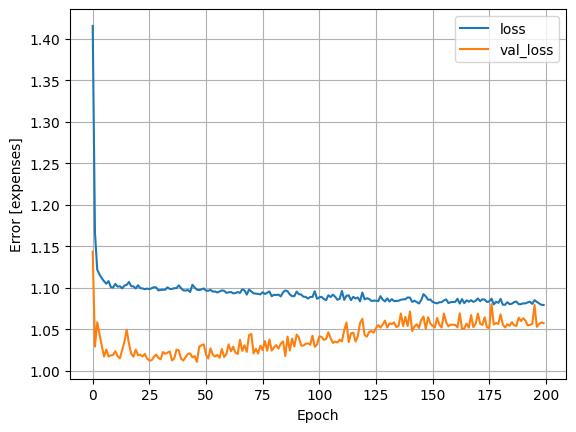

In [64]:
plot_loss(history)

#conclusion
en conclusion el procesamiento de datos para la linea regresional es algo sumamente importante para esta ya que ocupa que le pases los datos de la forma correcta para que funcione el modelo, en resumen debes de codificar las etiquetas, dividir la data para test y entrenamiento y ya por ultimo normalizar la data, con esto ya puedes hacer un modelo de la linea regresional

7/7 [==============================] - 0s 4ms/step


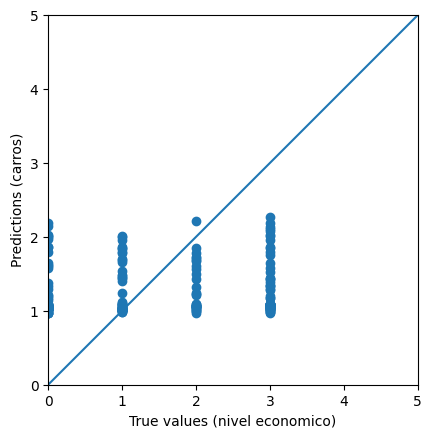

In [69]:
# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (nivel economico)')
plt.ylabel('Predictions (carros)')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)